In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [7]:
df=pd.read_csv(r"Data_Sets/Microsoft_Stock.csv")

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [9]:
#Convert Date to datetime and set as index
df["Date"]=pd.to_datetime(df["Date"])
df=df.set_index("Date").sort_index()
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


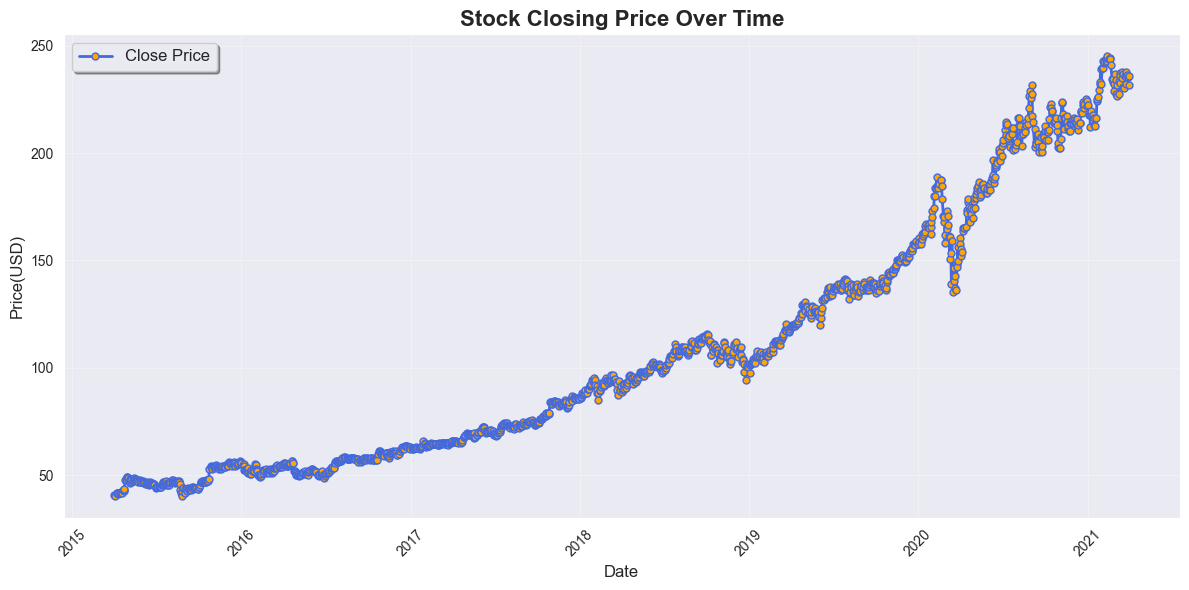

In [10]:
#apply style
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))

#plot close price
plt.plot(df.index,df["Close"],
         label="Close Price",
         color="royalblue",
         linewidth=2,
         marker="o",
         markersize=5,
         markerfacecolor="orange")

#add title and labels
plt.title("Stock Closing Price Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Date",fontsize=12)
plt.ylabel("Price(USD)",fontsize=12)

#rotate x axis labels
plt.xticks(rotation=45)

#add grid with transparency
plt.grid(alpha=0.3)

#add legend
plt.legend(loc="upper left", fontsize=12, frameon=True, shadow=True)

#Tight layout for better spacing
plt.tight_layout()

plt.show()

In [11]:
series=df["Close"]

#split data
train_size= int(len(series)*0.8)
train,test= series[:train_size],series[train_size:]

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
#Target Variable
series =df ["Close"]
result= adfuller(series)
print("ADF Statistic:",result[0])
print("p-value:",result[1])

if result[1]<= 0.05:
    print("Series is Stationary")
else:
    print("Series is not stationary,differencing needed")

ADF Statistic: 1.7371362899270988
p-value: 0.9982158366942122
Series is not stationary,differencing needed


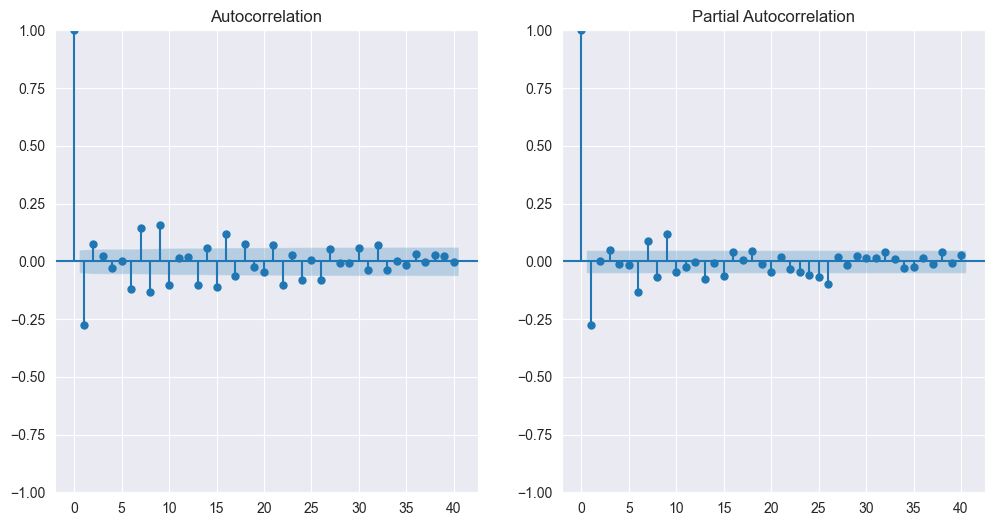

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(series.diff().dropna(),lags=40,ax=plt.gca()) #for q
plt.subplot(122)
plot_pacf(series.diff().dropna(),lags=40,ax=plt.gca()) #for p
plt.show()

c:\Time_Series_Forecast\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Time_Series_Forecast\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Time_Series_Forecast\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Time_Series_Forecast\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction

Test RMSE: 19.918248348827657


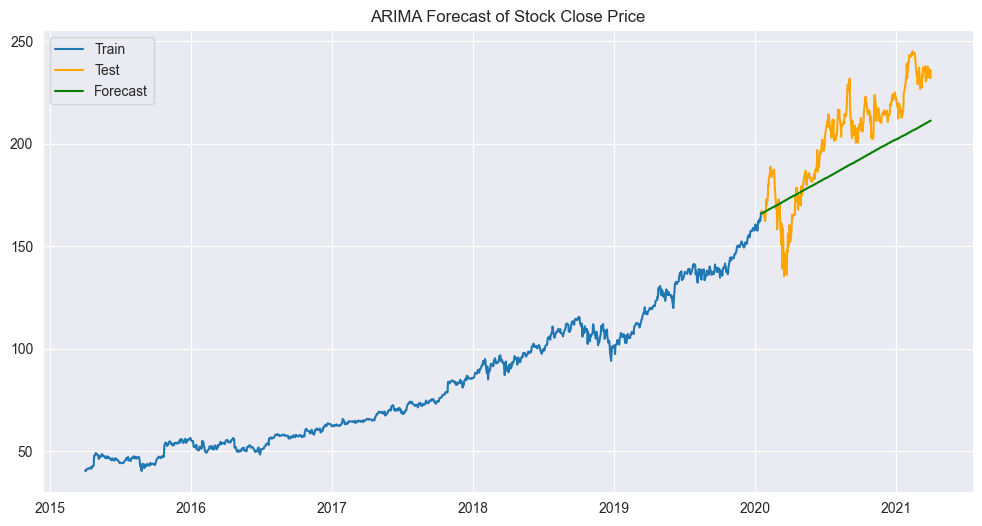

 ARIMA model saved as ARIMA_model.pkl


In [15]:
from statsmodels.tsa.arima.model import ARIMA


# Fit model
model = ARIMA(train, order=(1,2,1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test, forecast))
print("Test RMSE:", rmse)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="green")
plt.title(f"ARIMA Forecast of Stock Close Price")
plt.legend()
plt.show()

# Save ARIMA model
joblib.dump(model, "ARIMA_model.pkl")

print(" ARIMA model saved as ARIMA_model.pkl")

c:\Time_Series_Forecast\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Time_Series_Forecast\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Time_Series_Forecast\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Time_Series_Forecast\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return

Test RMSE: 12.04330225044334


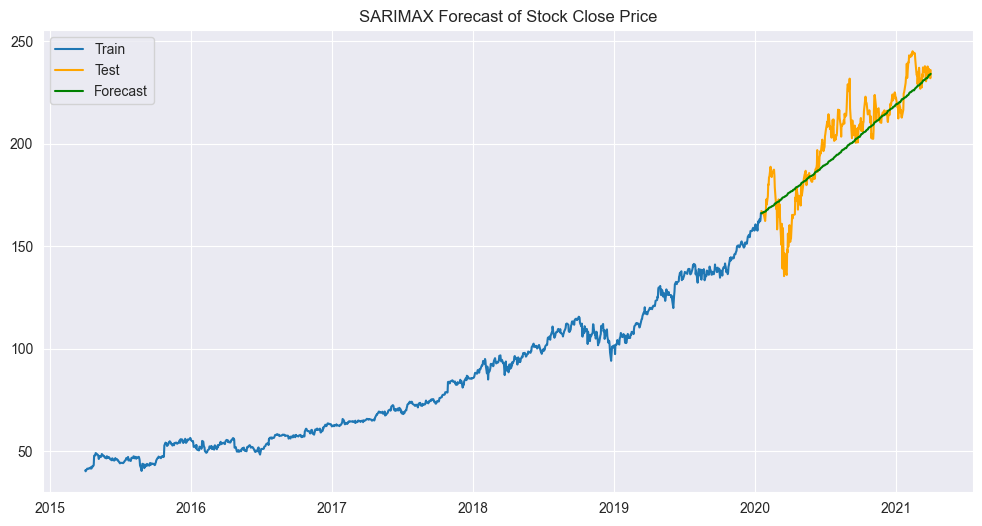

 SARIMAX model saved as SARIMAX_model.pkl


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(1,2,1),seasonal_order=(1,1,1,12))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

rmse = np.sqrt(mean_squared_error(test, forecast))
print("Test RMSE:", rmse)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="green")
plt.title(f"SARIMAX Forecast of Stock Close Price")
plt.legend()
plt.show()

# Save SARIMAX model
joblib.dump(model, "SARIMAX_model.pkl")

print(" SARIMAX model saved as SARIMAX_model.pkl")
